In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras


In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from tensorflow import keras
# from tensorflow.keras import layers
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense




In [ ]:
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
random_seed = 7
np.random.seed(random_seed)

In [ ]:
df=pd.read_csv('data/pima_diabetes.csv',header = None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data Pre-Processing

In [ ]:
df.head(5)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns


Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [ ]:
column_names = ['preg', 'plas', 'pres', 'skin','test','mass','pedi','age','class(yes/no)']  # Replace with your column names
df.columns = column_names

In [ ]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age',
       'class(yes/no)'],
      dtype='object')

In [ ]:
df.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class(yes/no)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Finding null values with sum

In [ ]:
df.isnull().sum()

preg             0
plas             0
pres             0
skin             0
test             0
mass             0
pedi             0
age              0
class(yes/no)    0
dtype: int64

In [ ]:
df.shape

(768, 9)

In [ ]:
df.dtypes

preg               int64
plas               int64
pres               int64
skin               int64
test               int64
mass             float64
pedi             float64
age                int64
class(yes/no)      int64
dtype: object

In [ ]:
df.describe(include=None)

,preg,plas,pres,skin,test,mass,pedi,age,class(yes/no)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.groupby('class(yes/no)').size()

class(yes/no)
0    500
1    268
dtype: int64

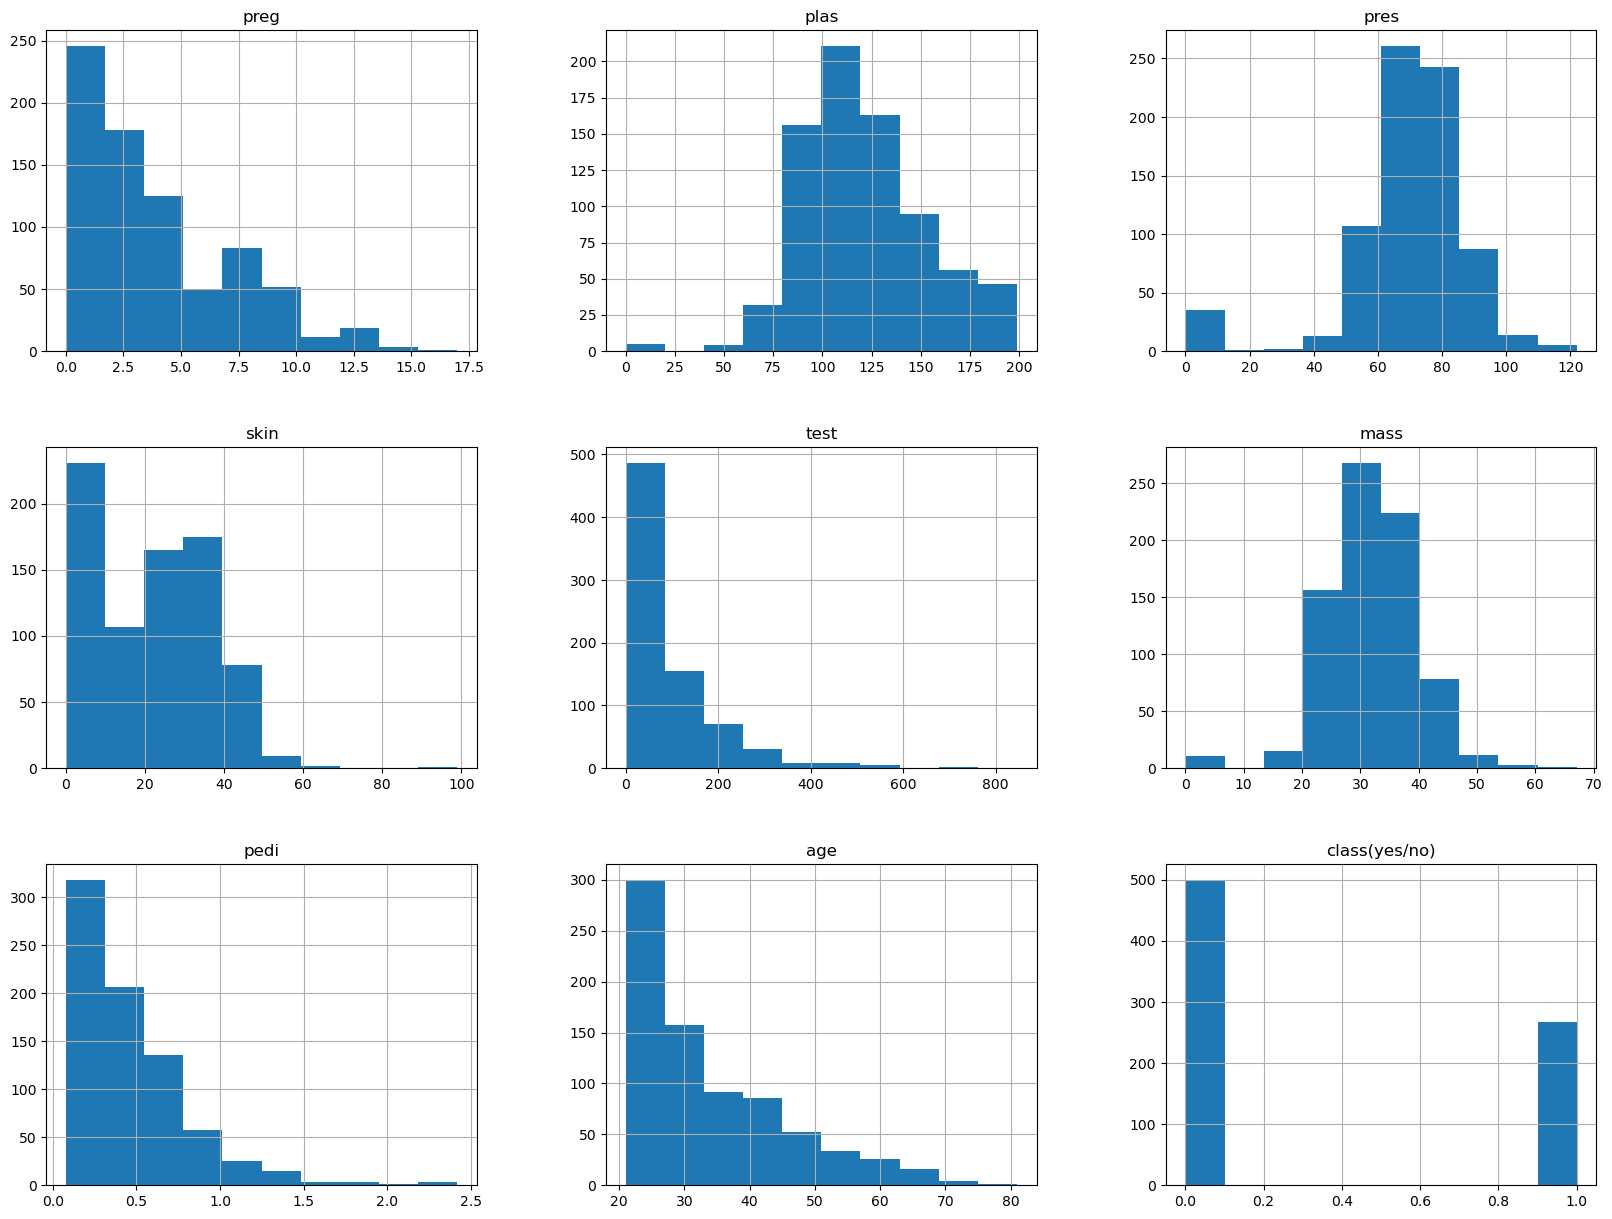

In [ ]:
df.hist(figsize=(20,15))
plt.show()

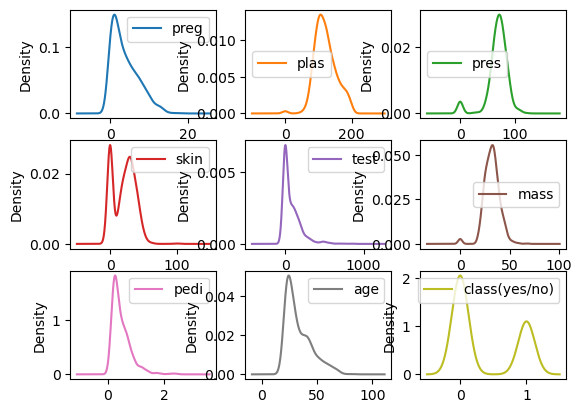

In [ ]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True)
plt.show()

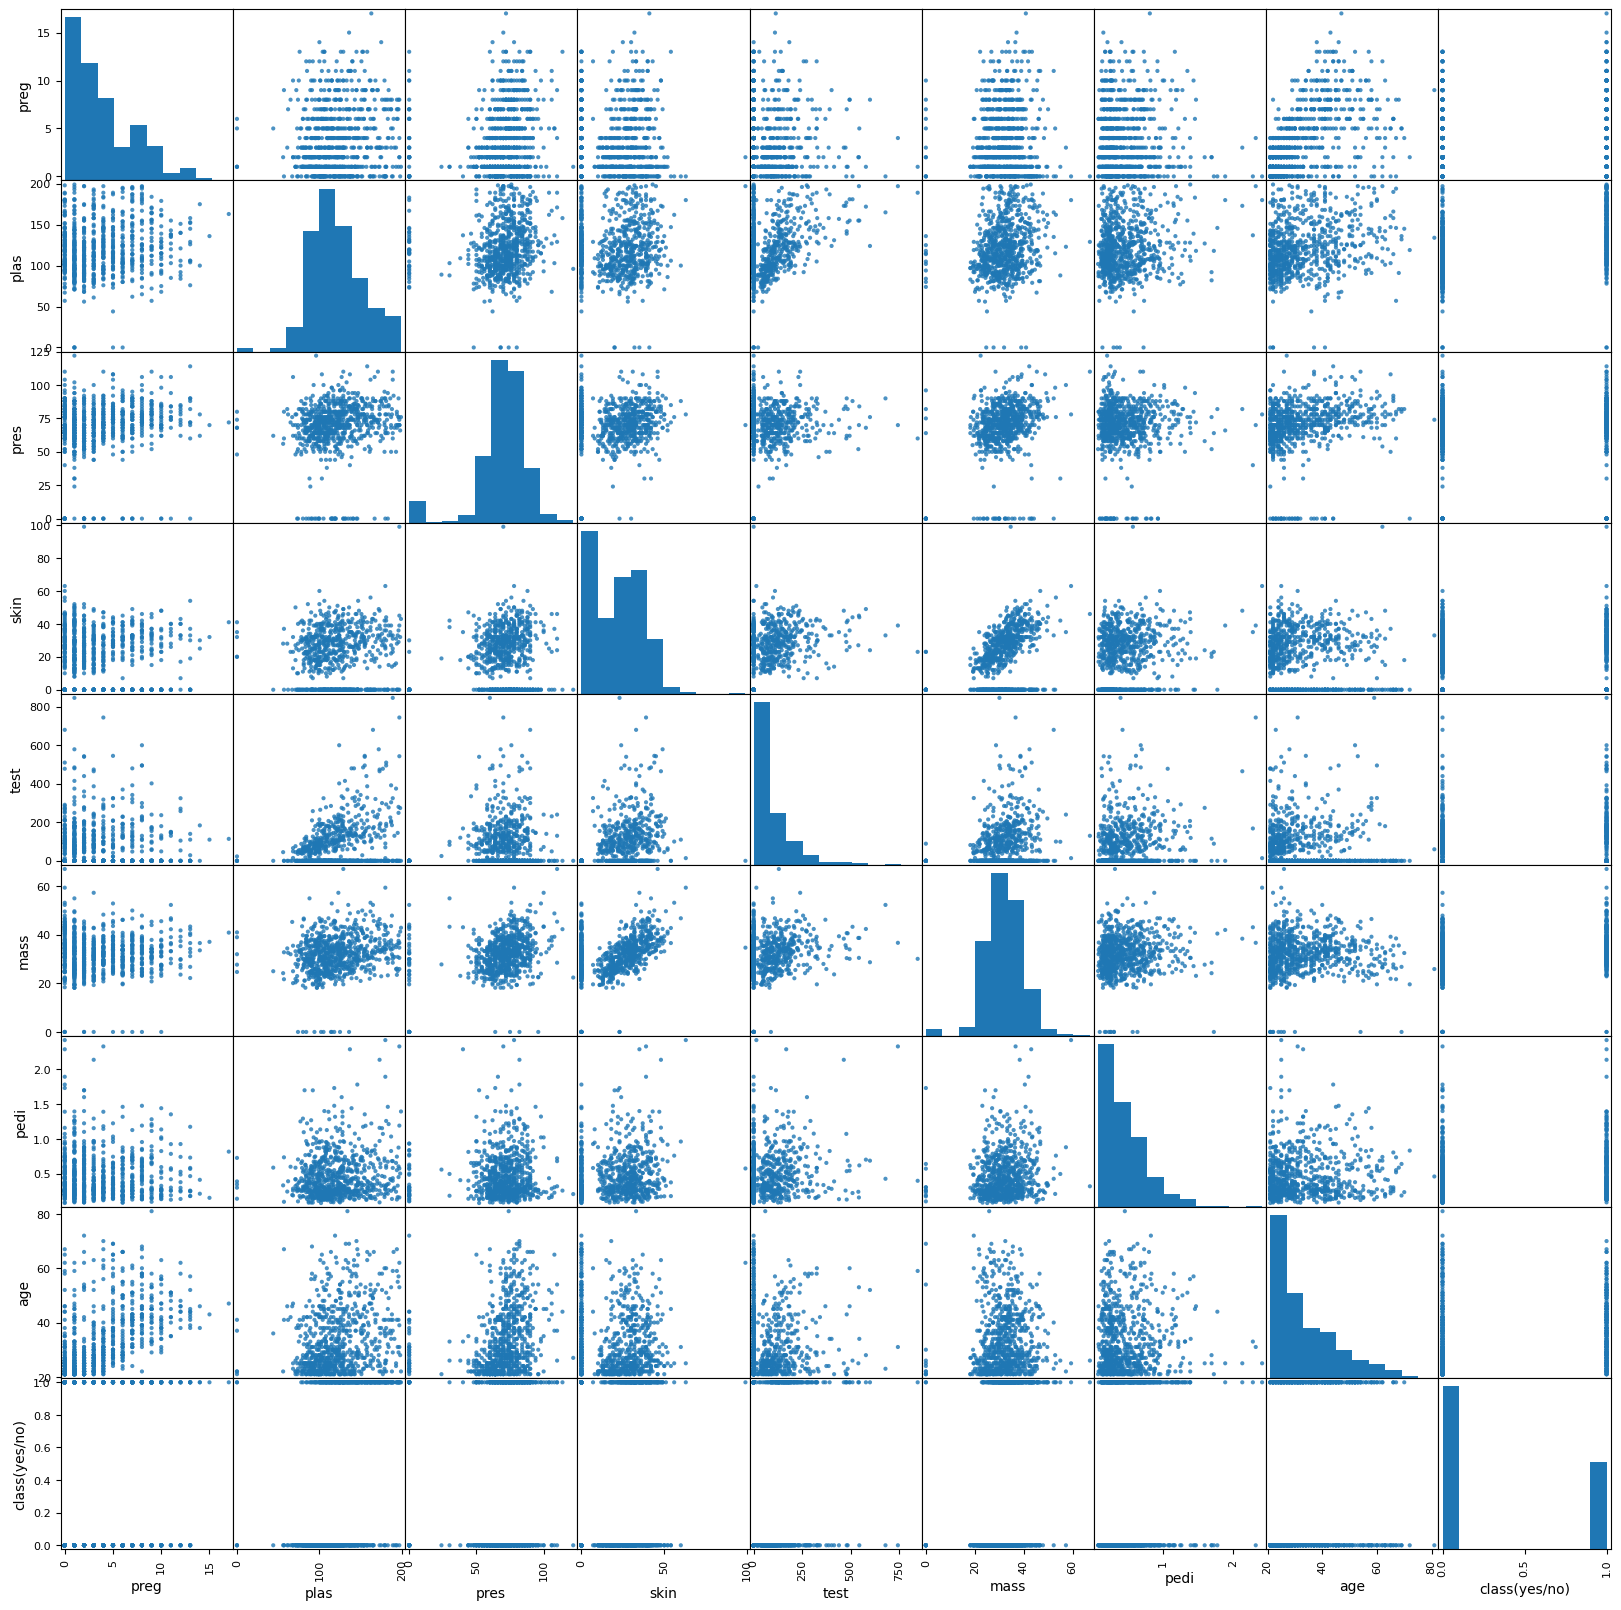

In [ ]:
#scatter plot matrix
scatter_matrix(df, alpha=0.8, figsize=(20,20))
plt.show()

In [ ]:
def find_outliers_z_score(df, threshold=3):
    outliers = pd.DataFrame()
    for column in df.columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        outliers[column] = z_scores > threshold
    return outliers

In [ ]:
ata = {
    'A': [1, 2, 2, 3, 4, 5, 6, 100],
    'B': [2, 3, 4, 5, 6, 7, 8, 200]
}
outliers_z = find_outliers_z_score(df)
print("Outliers using Z-Score:")
print(outliers_z)

Outliers using Z-Score:
      preg   plas   pres   skin   test   mass   pedi    age  class(yes/no)
0    False  False  False  False  False  False  False  False          False
1    False  False  False  False  False  False  False  False          False
2    False  False  False  False  False  False  False  False          False
3    False  False  False  False  False  False  False  False          False
4    False  False  False  False  False  False   True  False          False
..     ...    ...    ...    ...    ...    ...    ...    ...            ...
763  False  False  False  False  False  False  False  False          False
764  False  False  False  False  False  False  False  False          False
765  False  False  False  False  False  False  False  False          False
766  False  False  False  False  False  False  False  False          False
767  False  False  False  False  False  False  False  False          False

[768 rows x 9 columns]


# Seprate Dataset

In [ ]:
array=df.values

In [ ]:
X=array[:,0:8]
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [ ]:
Y=array[:,8]
print(Y)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

# Split Data

In [ ]:
test_size=0.33

In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=test_size,random_state=random_seed)

# Encode

# Building a MLP (Fully Connected NN)

In [ ]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))  # Adjusting units from 8 to 12 for better representation
    model.add(Dense(1, activation='sigmoid'))  # Using 'sigmoid' activation for binary classification
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Using 'binary_crossentropy' loss for binary classification
    return model

In [ ]:
model =baseline_model()

# Model Training

In [ ]:
# Converting X_train vlaues from object to float32
import numpy as np
X_train = X_train.astype(np.float32)

In [ ]:
history = model.fit(X_train, Y_train, epochs=150, batch_size=10)
training_accuracy = history.history['accuracy'][-1]


Epoch 1/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.7743
Epoch 2/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.7821
Epoch 3/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.7802
Epoch 4/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7879
Epoch 5/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7743
Epoch 6/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7821
Epoch 7/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7899
Epoch 8/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7646
Epoch 9/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7743
Epoch 10/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.7724
Epoch 11/

In [ ]:
print("Training Accuracy:", training_accuracy*100)

Training Accuracy: 80.1556408405304


# Evaluation

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:

evaluator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=10)


In [ ]:

kfold = KFold(n_splits=10, shuffle=True, random_state=random_seed)

In [ ]:

results = cross_val_score(evaluator, X_test, Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))


Epoch 1/200


C:\Users\gouth\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


23/23 [==============================] - 1s 3ms/step - loss: 2.3272 - accuracy: 0.5175
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 1.7871 - accuracy: 0.5614
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 1.5503 - accuracy: 0.5833
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 1.4016 - accuracy: 0.5789
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 1.3033 - accuracy: 0.5789
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 1.2792 - accuracy: 0.5482
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 1.2114 - accuracy: 0.5658
Epoch 8/200
23/23 [==============================] - 0s 3ms/step - loss: 1.1158 - accuracy: 0.5833
Epoch 9/200
23/23 [==============================] - 0s 3ms/step - loss: 1.1282 - accuracy: 0.5570
Epoch 10/200
23/23 [==============================] - 0s 4ms/step - loss: 1.0490 - accuracy: 0.5702
Epoch 11/200
23/23 [=

C:\Users\gouth\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


23/23 [==============================] - 1s 2ms/step - loss: 15.6387 - accuracy: 0.3991
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 9.2086 - accuracy: 0.5000
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 5.9953 - accuracy: 0.5702
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 4.3073 - accuracy: 0.5965
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 3.6138 - accuracy: 0.6228
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 3.2561 - accuracy: 0.6316
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 2.9129 - accuracy: 0.6360
Epoch 8/200
23/23 [==============================] - 0s 2ms/step - loss: 2.7056 - accuracy: 0.6228
Epoch 9/200
23/23 [==============================] - 0s 2ms/step - loss: 2.5473 - accuracy: 0.5877
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 2.3397 - accuracy: 0.6053
Epoch 11/200
23/23 [

C:\Users\gouth\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


23/23 [==============================] - 1s 2ms/step - loss: 64.3300 - accuracy: 0.3728
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 52.3214 - accuracy: 0.3728
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 40.8928 - accuracy: 0.3684
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 28.8407 - accuracy: 0.3816
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 17.3112 - accuracy: 0.3991
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 11.3141 - accuracy: 0.5000
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 8.1585 - accuracy: 0.5307
Epoch 8/200
23/23 [==============================] - 0s 2ms/step - loss: 6.1967 - accuracy: 0.5789
Epoch 9/200
23/23 [==============================] - 0s 2ms/step - loss: 4.1761 - accuracy: 0.5132
Epoch 10/200
23/23 [==============================] - 0s 3ms/step - loss: 3.2746 - accuracy: 0.5482
Epoch 11/200
23

C:\Users\gouth\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


23/23 [==============================] - 1s 2ms/step - loss: 29.2616 - accuracy: 0.3421
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 23.7545 - accuracy: 0.3772
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 19.8603 - accuracy: 0.4211
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 16.4664 - accuracy: 0.4474
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 13.2206 - accuracy: 0.4737
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 9.7639 - accuracy: 0.4649
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 6.3064 - accuracy: 0.4561
Epoch 8/200
23/23 [==============================] - 0s 2ms/step - loss: 3.7222 - accuracy: 0.4386
Epoch 9/200
23/23 [==============================] - 0s 2ms/step - loss: 2.9386 - accuracy: 0.5263
Epoch 10/200
23/23 [==============================] - 0s 3ms/step - loss: 2.9119 - accuracy: 0.5044
Epoch 11/200
23/

C:\Users\gouth\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


23/23 [==============================] - 1s 2ms/step - loss: 11.0545 - accuracy: 0.6376
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 4.7166 - accuracy: 0.6245
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 3.5819 - accuracy: 0.5022
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 3.0613 - accuracy: 0.5546
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 2.7498 - accuracy: 0.5590
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 2.7102 - accuracy: 0.4891
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 2.5353 - accuracy: 0.5415
Epoch 8/200
23/23 [==============================] - 0s 2ms/step - loss: 2.3399 - accuracy: 0.5240
Epoch 9/200
23/23 [==============================] - 0s 2ms/step - loss: 2.2516 - accuracy: 0.5022
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 2.1214 - accuracy: 0.4978
Epoch 11/200
23/23 [

C:\Users\gouth\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


23/23 [==============================] - 1s 3ms/step - loss: 14.9758 - accuracy: 0.4803
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 9.6829 - accuracy: 0.5022
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 5.6741 - accuracy: 0.6070
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 3.7009 - accuracy: 0.5502
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 2.7409 - accuracy: 0.5677
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 2.1818 - accuracy: 0.5022
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 1.9081 - accuracy: 0.5590
Epoch 8/200
23/23 [==============================] - 0s 4ms/step - loss: 1.8648 - accuracy: 0.5415
Epoch 9/200
23/23 [==============================] - 0s 4ms/step - loss: 1.8190 - accuracy: 0.5677
Epoch 10/200
23/23 [==============================] - 0s 4ms/step - loss: 1.7510 - accuracy: 0.5502
Epoch 11/200
23/23 [

C:\Users\gouth\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
23/23 [==============================] - 1s 2ms/step - loss: 6.8078 - accuracy: 0.5546
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 4.8580 - accuracy: 0.5546
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 3.1955 - accuracy: 0.5153
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 2.2626 - accuracy: 0.4367
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 1.7646 - accuracy: 0.4105
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 1.5467 - accuracy: 0.4061
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 1.4026 - accuracy: 0.4803
Epoch 8/200
23/23 [==============================] - 0s 3ms/step - loss: 1.2330 - accuracy: 0.4978
Epoch 9/200
23/23 [==============================] - 0s 3ms/step - loss: 1.1267 - accuracy: 0.5328
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 1.1467 - accuracy: 0.4934
Epoch 11/

C:\Users\gouth\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


23/23 [==============================] - 1s 3ms/step - loss: 28.8412 - accuracy: 0.3668
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 18.6994 - accuracy: 0.3624
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 13.6967 - accuracy: 0.4148
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 10.1394 - accuracy: 0.4585
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 7.7114 - accuracy: 0.5022
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 5.6343 - accuracy: 0.4978
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 4.1470 - accuracy: 0.5808
Epoch 8/200
23/23 [==============================] - 0s 3ms/step - loss: 3.7554 - accuracy: 0.6288
Epoch 9/200
23/23 [==============================] - 0s 4ms/step - loss: 3.4516 - accuracy: 0.6419
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 3.1944 - accuracy: 0.6288
Epoch 11/200
23/2

C:\Users\gouth\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


23/23 [==============================] - 1s 4ms/step - loss: 39.4425 - accuracy: 0.3581
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 31.0769 - accuracy: 0.3581
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 22.6198 - accuracy: 0.3624
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 13.1385 - accuracy: 0.3712
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 5.8985 - accuracy: 0.4061
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 4.1200 - accuracy: 0.5153
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 3.3330 - accuracy: 0.4891
Epoch 8/200
23/23 [==============================] - 0s 3ms/step - loss: 3.0702 - accuracy: 0.5284
Epoch 9/200
23/23 [==============================] - 0s 3ms/step - loss: 2.9181 - accuracy: 0.5502
Epoch 10/200
23/23 [==============================] - 0s 3ms/step - loss: 2.8104 - accuracy: 0.5590
Epoch 11/200
23/2

C:\Users\gouth\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


23/23 [==============================] - 1s 2ms/step - loss: 17.9625 - accuracy: 0.3493
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 10.0857 - accuracy: 0.3537
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 6.3006 - accuracy: 0.4367
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 3.7542 - accuracy: 0.4934
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 2.4842 - accuracy: 0.5109
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 1.9567 - accuracy: 0.4716
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 1.8521 - accuracy: 0.5066
Epoch 8/200
23/23 [==============================] - 0s 3ms/step - loss: 1.7560 - accuracy: 0.5109
Epoch 9/200
23/23 [==============================] - 0s 3ms/step - loss: 1.6997 - accuracy: 0.4760
Epoch 10/200
23/23 [==============================] - 0s 3ms/step - loss: 1.6297 - accuracy: 0.4847
Epoch 11/200
23/23 

In [ ]:

X_test = X_test.astype('float32')# Convert to float32 or float64 depending on your requirements
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))


8/8 [==============================] - 0s 4ms/step - loss: 0.5845 - accuracy: 0.7244

accuracy: 72.44%
